In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Zomatodata.csv")
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes  approx_cost(for two people) listed_in(type)  
0  4.1/5    775                          800          Buffet  
1  4.1/5    787

In [5]:
###Rate col has denominator we need to remove them

In [9]:

df['rate'] = df['rate'].str.split('/').str[0].astype(float)

print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

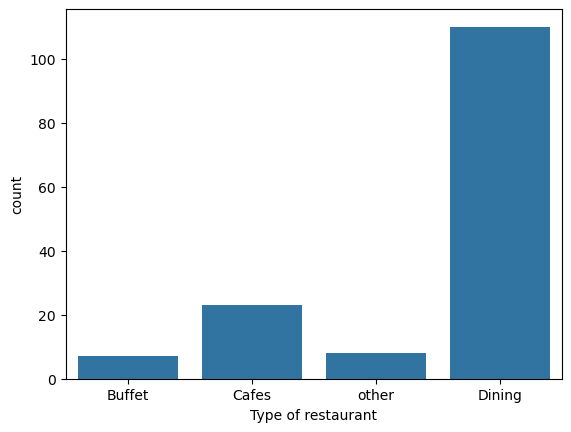

In [15]:
###no null value now 
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")


In [17]:
###majority type is dining

Text(0, 0.5, 'Votes')

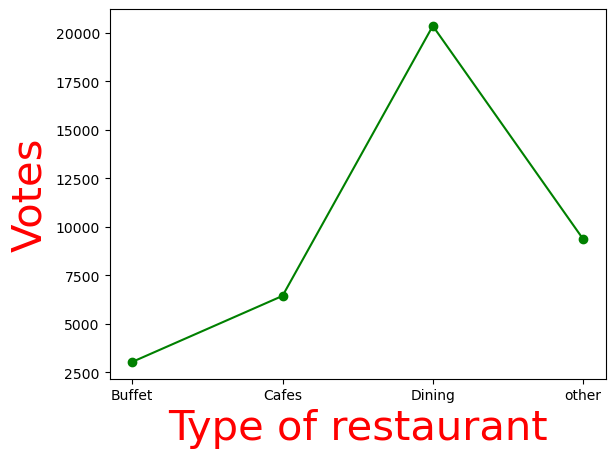

In [35]:
# Group by a single column and calculate the sum of another column
###dataframe.groupby('column_name')['another_column'].sum()
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=30)
plt.ylabel("Votes", c="red", size=30)


In [31]:
### 20000 votes for types of restaurant

<Axes: xlabel='online_order', ylabel='count'>

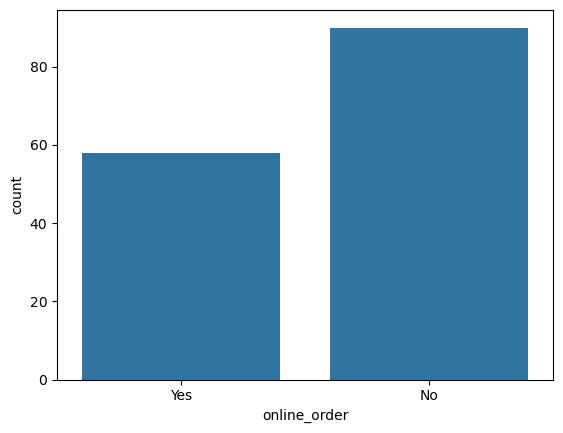

In [43]:
sns.countplot(x=df['online_order'])

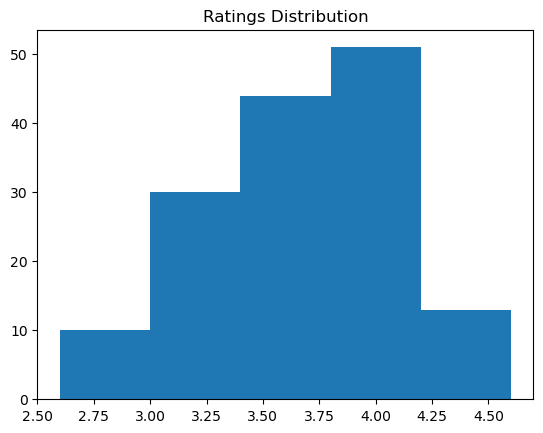

In [45]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

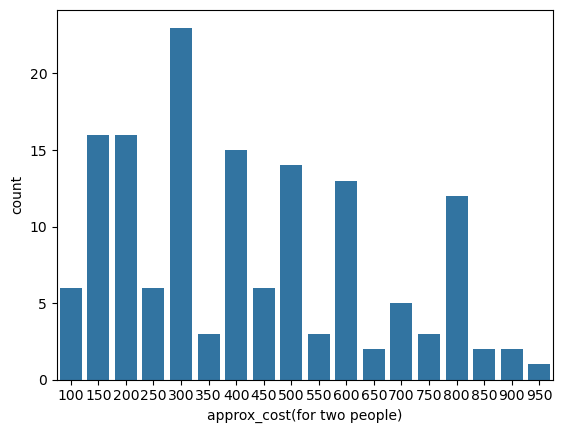

In [47]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [49]:
###Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

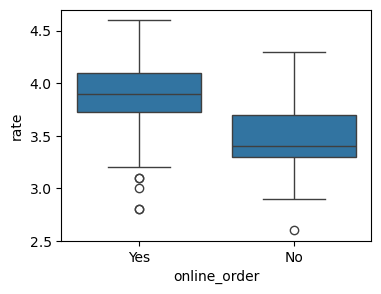

In [57]:
plt.figure(figsize = (4,3))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

In [59]:
### outliers are more in online orders than offline orders

In [61]:
###CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings

In [63]:
###heatmap plotting

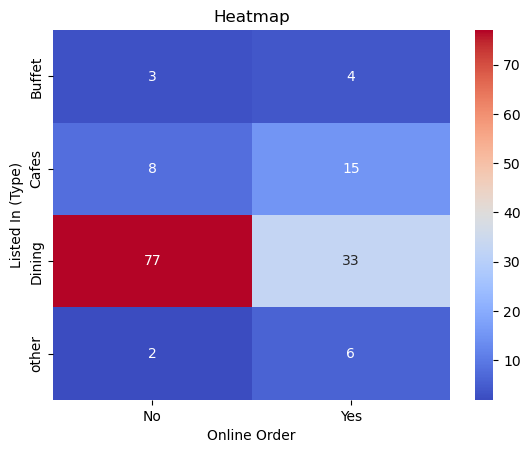

In [77]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [ ]:
###CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.